# Electric and Magnetic Fields of Wire with a Narrow Gap

<img src = 'Figures/Figure 1.jpg' width = 560>
Image source: $\href{http://www.moblerhome.com/brushed-aluminum-drum-table-or-pedestal}{link}$

$Question$

A fat wire of radius $a$ carries a constant current $I$ uniformly distributed over its cross-section. A narrow gap in the wire of width $w << a$ forms a sort of parallel plate capacitor. Assume the wire acts like infinite plates, so that the electric field lines in the gap are parallel.

(a) Find the electric and magnetic fields in the gap as a function of the distance $s$ from the axis and the time $t$. (Assume the charge is zero at $t = 0$).

(b) Find the Poynting vector $\vec{S}$ in the gap. Pay attention to the direction of $\vec{S}$.

$Goal$

Plot the electric field $\vec{E}$ as a function of radius $s$ from the wire's central axis.

Plot the magnetic field $\vec{B}$ as a function of radius $s$ from the wire's central axis.

Plot the Poynting vector $\vec{S}$ as a function of radius $s$ from the wire's central axis.

$Equation$

The equation for the electric field in this narrow gap is 

<blockquote>
$E = \frac{I t}{\pi a^2 \epsilon_{0}} \hat{z}$. 
</blockquote>

Notice that $\vec{E} = \vec{E}(t)$ is independent of radius $s$ from the central axis of the wire.

The equation for the magnetic field in this narrow gap is 

<blockquote>
$B = \frac{\mu_{0} I s}{2 \pi a^{2}} \hat{\phi}$. 
</blockquote>

Notice that $\vec{B} = \vec{B}(s)$ is independent of time $t$.

The equation for the Poynting vector is 

<blockquote>
$\vec{S} = -\frac{\mu_{0} I^2 c^2 t s}{2 \pi^2 a^4} \hat{s}$.
</blockquote>


<details>

<summary> Why? </summary>

<p>

The equation for the electric field $\vec{E}$ comes from the expression for the electric field between two parallel plates with charge density $\sigma$, 

<blockquote>
<div> $E = \frac{\sigma}{\epsilon_0}$.
</blockquote>

Assuming the current starts at time $t = 0$, the charge on the plates is $Q(t) = I \cdot t$. The charge density is 

<blockquote>
$\sigma(t) = \frac{charge}{area} = \frac{I t}{\pi a^2}$.
</blockquote>

Then

<blockquote>
<div> $E = \frac{\sigma(t)}{\epsilon_0} = \frac{I t}{\pi a^2 \epsilon_{0}}$
</blockquote>

is the expression for the electric field in the gap.


For the magnetic field $B$, use Maxwell's equation
<blockquote>
$\vec{\nabla} \times \vec{B} = \mu_0 \vec{J} + \mu_0 \epsilon_0 \frac{\partial \vec{E}}{\partial t}$
</blockquote>
and state that $\vec{J} = 0$ inside the gap to get that
<blockquote>
$\vec{\nabla} \times \vec{B} = 0 + \mu_0 \epsilon_0 (\frac{I}{\pi a^2 \epsilon_0}) = \frac{\mu_0 I}{\pi a^2}$.
</blockquote>

Use Stokes' theorem:
<blockquote>
<div> $\int{(\vec{\nabla} \times \vec{B})} \cdot d\vec{a} = \oint{\vec{B} \cdot} d\vec{l}$ </div>
<div> $\frac{\mu_0 I}{\pi a^2} (\pi s^2) = |\vec{B}| (2 \pi s)$,</div>
</blockquote>
so
<blockquote>
$B = \frac{\mu_0 I s}{2 \pi a^2}$.
</blockquote>


Finally, find the Poynting vector $\vec{S}$ using the equation
<blockquote>
$S = \frac{1}{\mu_0} \vec{E} \times \vec{B}$.
</blockquote>

</p>

</details>

### Import packages.

In [2]:
# Import numpy.
import numpy as np
# Import 3-dimensional plotting package.
from mpl_toolkits.mplot3d import axes3d

### Define constants.
- Define constants important to the problem: current $I$, permittivity of free space $\epsilon_{0}$, permeability of free space $\mu_{0}$, and the wire radius $a$.
- For constants $I$ and $a$ that are not given, estimate a reasonable value. Anything "reasonable" will do, so long as the specified relationships ($w << a$) can arguably apply.

In [3]:
I = 4
e_0 = 8.85 * 10**(-12)
u_0 = 1.26 * 10**(-6)
a = 0.005

## Electric and Magnetic Field

### Define functions for electric and magnetic field.
- Define a function for the magnitude of the electric field and magnetic field as a function of time and position. Here the electric field does not depend on position, and the magnetic field does not depend on time.

In [1]:
def E(t):
    return (I * t) / (np.pi * a**2 * e_0)
def B(s):
    return (u_0 * I * s) / (2 * np.pi * a**2)

### Plot the electric and magnetic fields together.
- Plot the values for $E(t)$ and $B(s)$ within a circular region of radius $a$ (to represent the wire).

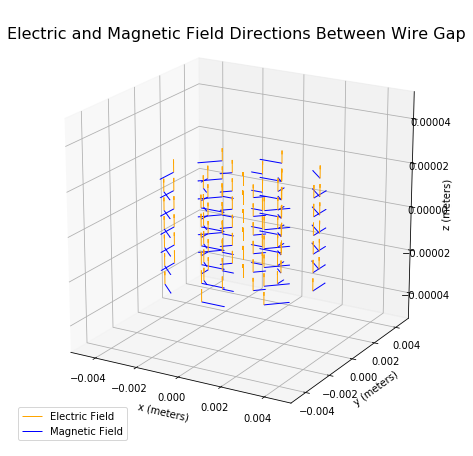

In [11]:
#Make a three-dimensional plot.
fig = plt.figure(figsize = (8, 8))
ax = fig.gca(projection = '3d')

#Define the width of the gap. It is "much smaller than a". At this point, I am guessing about the magnitude appropriate for this approximation.
w = a/100

#Make a grid of points where vectors of the vector field are placed.
#Only want vectors within the cylindrical gap region centered at the origin.
s_lim = a
phi_lim = 2 * np.pi
z_lim = w/2

S, PHI, Z = np.meshgrid(np.arange(0, s_lim, s_lim/3),
                        np.arange(0, phi_lim, phi_lim/8),
                        np.arange(-z_lim, z_lim, z_lim/3))

#Choose a time (in seconds) to plot the electric and magnetic fields, since the electric field is changing with time.
t = 0.5

X = S * np.cos(PHI)
Y = S * np.sin(PHI)
Z = Z
U_electric = 0
V_electric = 0
W_electric = E(t)/(0.5*10**21)
U_magnetic = B(S) * (-np.sin(PHI)) * 10
V_magnetic = B(S) * (np.cos(PHI)) * 10
W_magnetic = 0

#Plot the vector field - electric field.
ax.quiver(X, Y, Z, U_electric, V_electric, W_electric, color = 'orange', arrow_length_ratio = 0.3, linewidths = 1, length = 1, label = "Electric Field")
#Plot the vector field - magnetic field.
ax.quiver(X, Y, Z, U_magnetic, V_magnetic, W_magnetic, color = 'b', arrow_length_ratio = 0.0005, linewidths = 1, length = 1, label = "Magnetic Field")

ax.set_xlim3d(-0.005, 0.005)
ax.set_ylim3d(-0.005, 0.005)
ax.set_zlim3d(-2*z_lim, 2*z_lim)

#Adjust the viewing angle of the plot.
ax.view_init(elev = 20, azim = 300)

#Label the plot.
ax.set_xlabel('x (meters)')
ax.set_ylabel('y (meters)')
ax.set_zlabel('z (meters)')
ax.legend(loc = 'lower left')

ax.set_title('Electric and Magnetic Field Directions Between Wire Gap', fontsize = 16)

plt.show()

### Plot only the electric field.

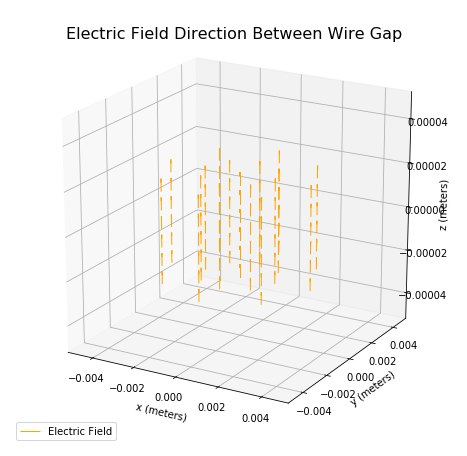

In [13]:
#Plot only the ELECTRIC FIELD.
#Make a three-dimensional plot.
fig = plt.figure(figsize = (8, 8))
ax = fig.gca(projection = '3d')

#Define the width of the gap. It is "much smaller than a". At this point, I am guessing about the magnitude appropriate for this approximation.
w = a/100

#Make a grid of points where vectors of the vector field are placed.
#Only want vectors within the cylindrical gap region centered at the origin.
s_lim = a
phi_lim = 2 * np.pi
z_lim = w/2

S, PHI, Z = np.meshgrid(np.arange(0, s_lim, s_lim/3),
                        np.arange(0, phi_lim, phi_lim/8),
                        np.arange(-z_lim, z_lim, z_lim/3))

#Choose a time (in seconds) to plot the electric and magnetic fields, since the electric field is changing with time.
t = 0.5

X = S * np.cos(PHI)
Y = S * np.sin(PHI)
Z = Z
U_electric = 0
V_electric = 0
W_electric = E(t)/(0.5*10**21)

#Plot the vector field - electric field.
ax.quiver(X, Y, Z, U_electric, V_electric, W_electric, color = 'orange', arrow_length_ratio = 0.3, linewidths = 1, length = 1, label = "Electric Field")

ax.set_xlim3d(-0.005, 0.005)
ax.set_ylim3d(-0.005, 0.005)
ax.set_zlim3d(-2*z_lim, 2*z_lim)

#Adjust the viewing angle of the plot.
ax.view_init(elev = 20, azim = 300)

#Label the plot.
ax.set_xlabel('x (meters)')
ax.set_ylabel('y (meters)')
ax.set_zlabel('z (meters)')
ax.legend(loc = 'lower left')

ax.set_title('Electric Field Direction Between Wire Gap', fontsize = 16)

plt.show()

### Plot only the magnetic field.

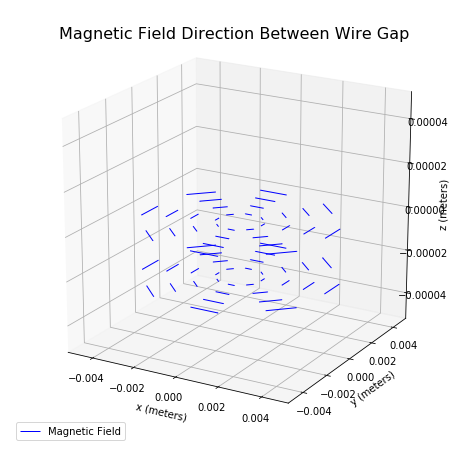

In [12]:
#Plot only the MAGNETIC FIELD.
#Make a three-dimensional plot.
fig = plt.figure(figsize = (8, 8))
ax = fig.gca(projection = '3d')

#Define the width of the gap. It is "much smaller than a". At this point, I am guessing about the magnitude appropriate for this approximation.
w = a/100

#Make a grid of points where vectors of the vector field are placed.
#Only want vectors within the cylindrical gap region centered at the origin.
s_lim = a
phi_lim = 2 * np.pi
z_lim = w/2

S, PHI, Z = np.meshgrid(np.arange(0, s_lim, s_lim/5),
                        np.arange(0, phi_lim, phi_lim/8),
                        np.arange(-z_lim, z_lim, z_lim))

#Choose a time (in seconds) to plot the electric and magnetic fields, since the electric field is changing with time.
t = 0.5

X = S * np.cos(PHI)
Y = S * np.sin(PHI)
Z = Z
U_magnetic = B(S) * (-np.sin(PHI)) * 10
V_magnetic = B(S) * (np.cos(PHI)) * 10
W_magnetic = 0

#Plot the vector field - magnetic field.
ax.quiver(X, Y, Z, U_magnetic, V_magnetic, W_magnetic, color = 'b', arrow_length_ratio = 0.0005, linewidths = 1, length = 1, label = "Magnetic Field")

ax.set_xlim3d(-0.005, 0.005)
ax.set_ylim3d(-0.005, 0.005)
ax.set_zlim3d(-2*z_lim, 2*z_lim)

#Adjust the viewing angle of the plot.
ax.view_init(elev = 20, azim = 300)

#Label the plot.
ax.set_xlabel('x (meters)')
ax.set_ylabel('y (meters)')
ax.set_zlabel('z (meters)')
ax.legend(loc = 'lower left')

ax.set_title('Magnetic Field Direction Between Wire Gap', fontsize = 16)

plt.show()

### Define a function for the Poynting vector.

In [3]:
#Define the Poynting vector as a function of time and position.
c = 2.99792 * 10**8
def Poynting(t, s):
    return - (u_0 * I**2 * c**2 * t * s) / (2 * np.pi**2 * a**4)

### Plot the Poynting vector.

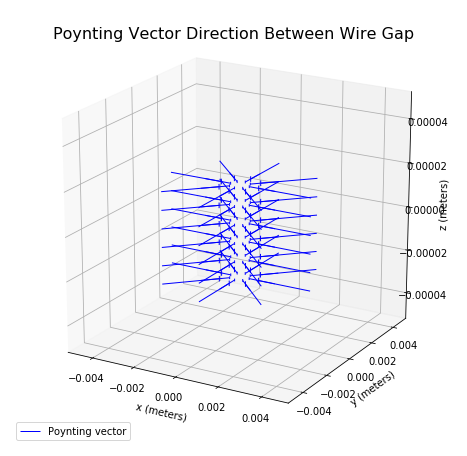

In [34]:
#Plot the Poynting vector.
fig = plt.figure(figsize = (8, 8))
ax = fig.gca(projection = '3d')

#Define the width of the gap. It is "much smaller than a". At this point, I am guessing about the magnitude appropriate for this approximation.
w = a/100

#Make a grid of points where vectors of the vector field are placed.
#Only want vectors within the cylindrical gap region centered at the origin.
s_lim = a
phi_lim = 2 * np.pi
z_lim = w/2

S, PHI, Z = np.meshgrid(np.arange(0, s_lim, s_lim/3),
                        np.arange(0, phi_lim, phi_lim/8),
                        np.arange(-z_lim, z_lim, z_lim/3))

#Choose a time (in seconds) to plot the electric and magnetic fields, since the electric field is changing with time.
t = 0.5

X = S * np.cos(PHI)
Y = S * np.sin(PHI)
Z = Z
U_Poynting = Poynting(t, S) * (np.cos(PHI)) / 10**20
V_Poynting = Poynting(t, S) * (np.sin(PHI)) / 10**20
W_Poynting = 0

#Plot the vector field - magnetic field.
ax.quiver(X, Y, Z, U_Poynting, V_Poynting, W_Poynting, color = 'b', arrow_length_ratio = 0.002, linewidths = 1, length = 1, label = 'Poynting vector')

ax.set_xlim3d(-0.005, 0.005)
ax.set_ylim3d(-0.005, 0.005)
ax.set_zlim3d(-2*z_lim, 2*z_lim)

#Adjust the viewing angle of the plot.
ax.view_init(elev = 20, azim = 300)

#Label the plot.
ax.set_xlabel('x (meters)')
ax.set_ylabel('y (meters)')
ax.set_zlabel('z (meters)')
ax.legend(loc = 'lower left')

ax.set_title('Poynting Vector Direction Between Wire Gap', fontsize = 16)

plt.show()